# AutoEncoders in Images

## What is an AutoEncoder?

In a sense, is just an encoder which reduces the dimensionality at each step up to a bottleneck, which we know as latent representation. Then the decoder does the same but in the inverse way, and thats it, it tries to match the original image as much as possible.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Model, Input

In [36]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Fashion MNIST, as well as MNIST, are 28x28 images of fashion items.

### Defining the Model

In [37]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super().__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    # Fill with:
    # - Flattening
    # - a Dense layer of half the dimensions taken from shape and activation selu, then
    # - a Dense layer to the latent dim
    self.encoder = None
    # Do the inverse
    self.decoder = None

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  def build_graph(self):
    # implement
    pass


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [38]:
# Compile with Adam and MSE
None

In [39]:
autoencoder.build_graph()

In [40]:
autoencoder.summary()

Model: "autoencoder_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 64)                332872    
                                                                 
 sequential_19 (Sequential)  (None, 28, 28)            333592    
                                                                 
Total params: 666464 (2.54 MB)
Trainable params: 666464 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
#Fit for 10 epochs

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0150 - val_loss: 0.0111
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0079 - val_loss: 0.0081
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.007

Testing

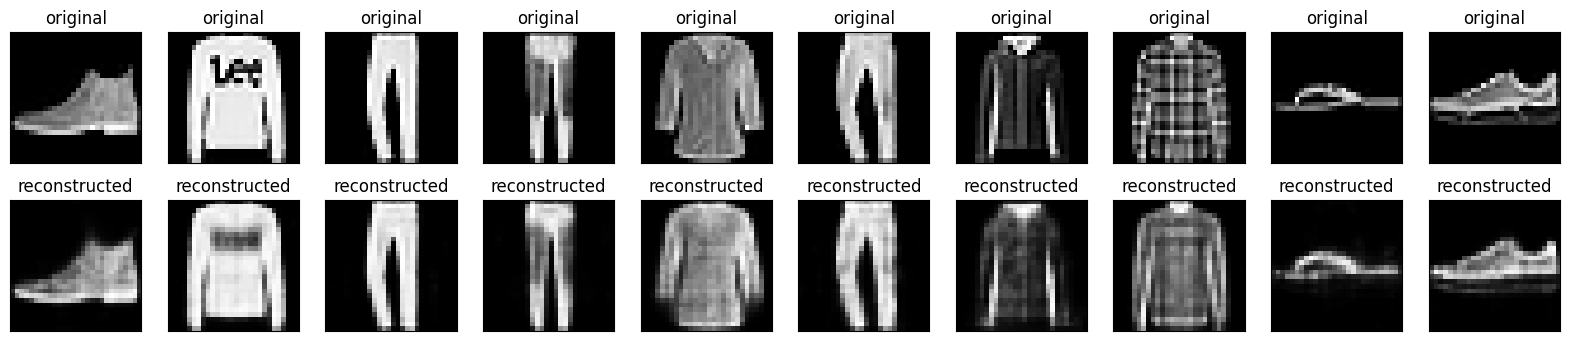

In [42]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()